In [74]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

#Fitting the part. Th

In [75]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

18
found *.csv file: 
['/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/

In [76]:
file_num=12
marker=['>','o','o','o','o','s','s','s','s','s','s','^']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])


1983 CESAR
df:(1,4)
F ratio: 0.677669954247
ftest:0.456637450542
sinking   :5.447018e+02,error:3.175587e+02

1987 ARKIV/3 Stn1
df:(1,6)
F ratio: 0.76229878204
ftest:0.416180009339
sinking   :6.292958e+02,error:1.344860e+02

1987 ARKIV/3 Stn2
df:(1,5)
F ratio: 6.94920648679
ftest:0.0461906384747
sinking   :7.788012e+02,error:9.895013e+01

1987 ARKIV/3 Stn3
df:(1,5)
F ratio: 0.185375137613
ftest:0.684721811534
sinking   :2.284856e+02,error:2.759698e+01

1987 ARKIV/3 Stn4
df:(1,4)
F ratio: 0.861593231808
ftest:0.405833475399
sinking   :5.255132e+02,error:4.295360e+02

1991 ARCTIC EXPEDITION Stn1
df:(1,3)
F ratio: 15.0259124852
ftest:0.030398109883
sinking   :1.267868e+03,error:2.478135e+02

1991 ARCTIC EXPEDITION Stn2
df:(1,2)
F ratio: 166.796470041
ftest:0.00594194787773
sinking   :8.718359e+02,error:1.480314e+01

1991 ARCTIC EXPEDITION Stn3
df:(1,4)
F ratio: 13.0657706655
ftest:0.0224634096316
sinking   :4.708677e+02,error:4.540157e+01

1991 ARCTIC EXPEDITION Stn4
df:(1,4)
F ratio: 20.

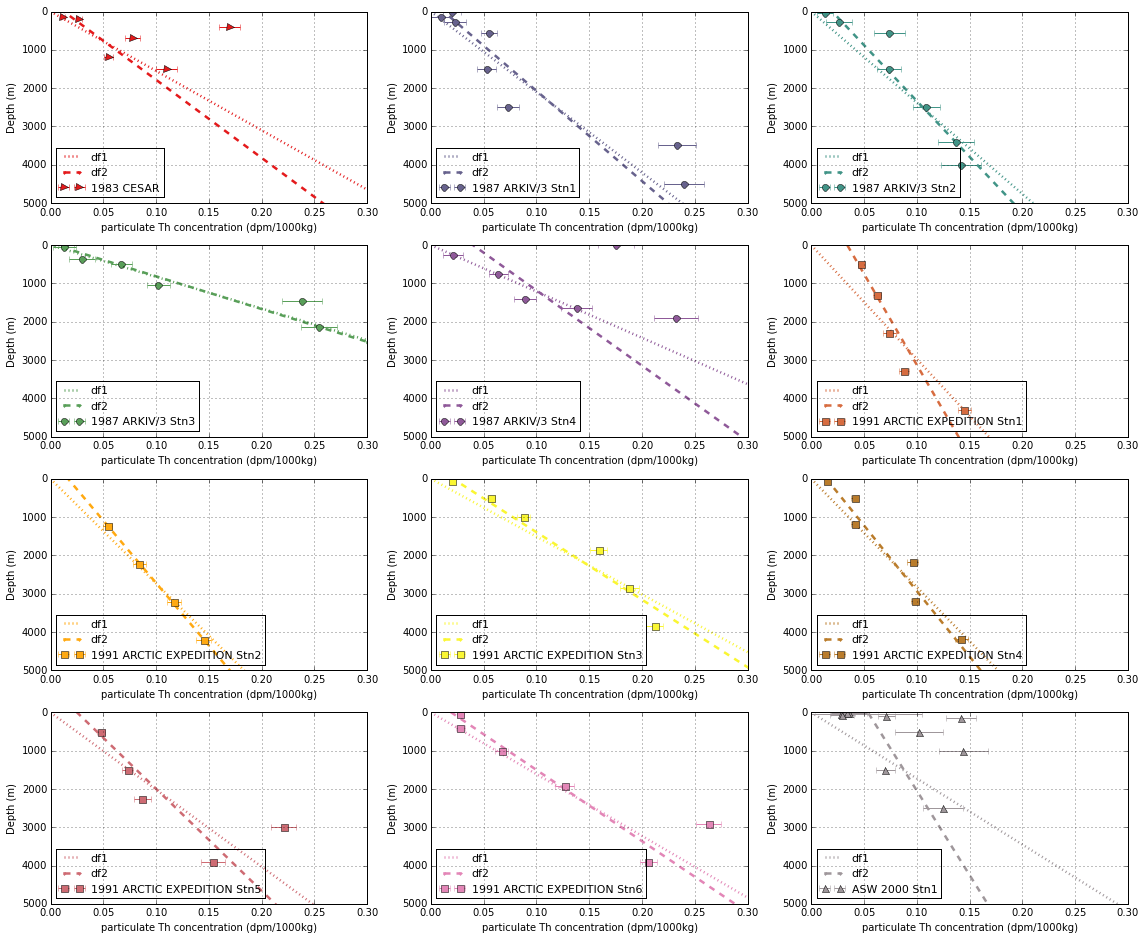

In [77]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(file_num):

    data=pd.read_csv(nc_filename[j])

    y= data['depth'];
    name= data['name'][0];
    x=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_part_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    
    y2 = sm.add_constant(y,prepend=False)
    #y2=y
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()
    
    ftest=sm.WLS(x, y, weights=1./err**2).fit()


    model1=np.sum(ftest.resid**2/err**2)
    model2=np.sum(res_wls.resid**2/err**2)
    rss1[j]=model1
    rss2[j]=model2
    
    p1 = 1
    p2 = 2
    n = len(x)
    #F = (ftest.mse_resid - res_wls.mse_resid)/(res_wls.mse_resid) *(n-p2)/(p2-p1)
    F = ( model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    WLS_coefc[j,:]=res_wls.params[1]
    WLS_errc[j,:] = res_wls.bse[1]
    sinking_rate[j,:]=0.0267/res_wls.params[0]
    err1=(WLS_err1[j,:]/WLS_coef1[j,:])*1/WLS_coef1[j,:]*0.0267
  
    
    
    print ('')
    print (name)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('F ratio: %s'%F)
    print ('ftest:%s'%p)
    print ('sinking   :%e,error:%e'%(sinking_rate[j,:],err1))

    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)#Spectral(j*23)
    ax.plot([0, 0.3],[0, 0.3]/ftest.params[0], ':',c=cc,linewidth=2.5,label='df1')
    ax.plot([0, 0.3],[0, 0.3]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
#    if j+1==1 or j+1==5 or j+1==9:
    plt.ylabel('Depth (m)')
#    if j+1==10 or j+1==11: #or j+1==9:
#        plt.xlabel('Particulate Th concentration (dpm/1000kg)')
    plt.xlabel('particulate Th concentration (dpm/1000kg)')
#    plt.ylabel('Depth (m)')
#    if not(j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    plt.tight_layout()
#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
plt.show()

In [78]:
#f_test
p1 = 1
p2 = 2
n = 77
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,53)
F ratio: 7.09221676847
ftest:0.00947012081235


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            WLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           4.36e-08
Time:                        13:49:23   Log-Likelihood:                -18.220
No. Observations:                  12   AIC:                             38.44
Df Residuals:                      11   BIC:                             38.92
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0002   1.32e-05     13.194      0.000         0.000     0.000
Omnibus:                        4.142   Durbin-Watso

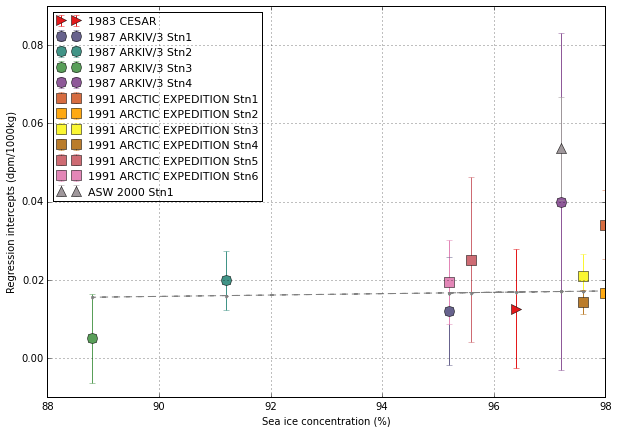

In [79]:
#test the intercepts(dust) with sea ice concentration
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2])

dust = sm.WLS(WLS_coefc,i,weights=1./WLS_errc**2).fit() 

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i,dust.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],WLS_coefc[j],yerr=WLS_errc[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)

ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Regression intercepts (dpm/1000kg)')
print dust.summary()
plt.grid()
plt.show()

#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [80]:
WLS_err2=np.empty([file_num,1])
Kvalue=np.empty([file_num,1])
Jvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])
Kapa=np.empty([file_num,1])


1983 CESAR
F ratio: 34.1510626378
df:(1,5)
ftest:0.00207663152684
K   :[ 0.06115372]
J   :[ 0.95244714]

1987 ARKIV/3 Stn1
F ratio: 9.03701597921
df:(1,6)
ftest:0.0238180645183
K   :[ 0.16881871]
J   :[ 0.22165037]

1987 ARKIV/3 Stn2
F ratio: 5.12081555682
df:(1,5)
ftest:0.0730836974528
K   :[ 0.14284321]
J   :[ 0.69961763]

1987 ARKIV/3 Stn3
F ratio: 27.887579371
df:(1,5)
ftest:0.00324262815518
K   :[ 0.34314836]
J   :[ 0.31766545]

1987 ARKIV/3 Stn4
F ratio: 19.8727076299
df:(1,4)
ftest:0.0111785390507
K   :[ 0.15117127]
J   :[ 0.38590799]

1991 ARCTIC EXPEDITION Stn1
F ratio: 8.14183938216
df:(1,3)
ftest:0.0649280055878
K   :[ 0.06824489]
J   :[ 0.26706387]

1991 ARCTIC EXPEDITION Stn2
F ratio: 4.23338721961
df:(1,2)
ftest:0.175896148077
K   :[ 0.09575117]
J   :[ 0.29030449]

1991 ARCTIC EXPEDITION Stn3
F ratio: 0.00281251777574
df:(1,4)
ftest:0.960248406414
K   :[ 0.15973329]
J   :[ 1.26940982]

1991 ARCTIC EXPEDITION Stn4
F ratio: 27.4020430524
df:(1,4)
ftest:0.00636324785207
K  

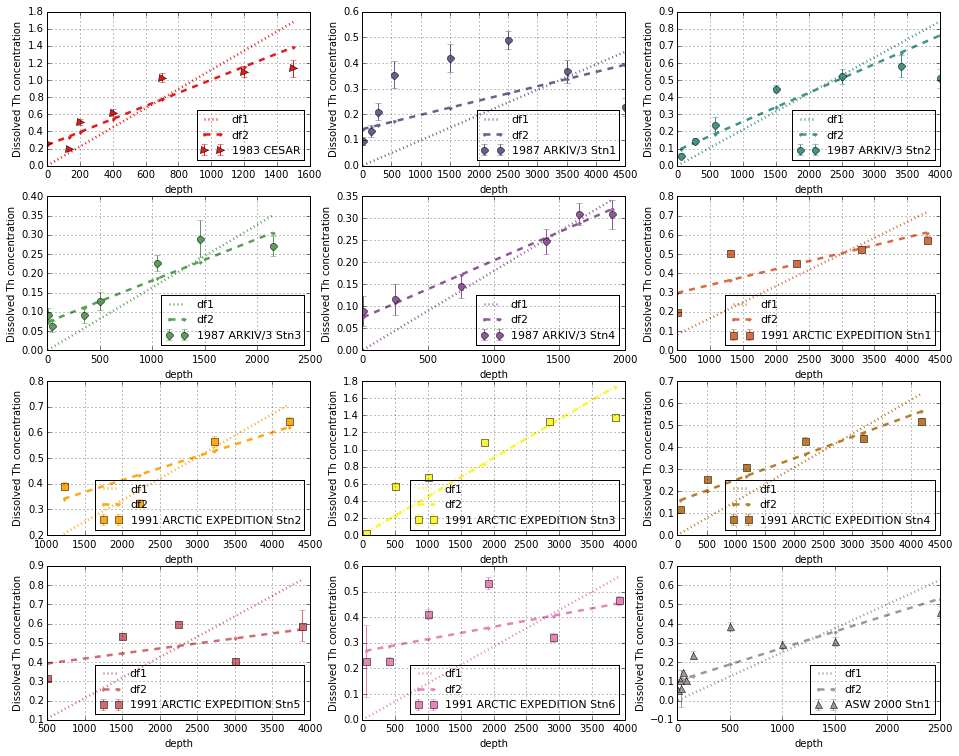

In [81]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_diss_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    y2=y
    
    #fit: model2
    y3 = sm.add_constant(y2,prepend=False)  
    res_wls2 = sm.WLS(x,y3, weights=1./err**2).fit() 
    
    Q=0.0267
    a=-res_wls2.params[0]
    b=res_wls2.params[1]
    Kvalue[j]=Q**2/(b*Q-WLS_coefc[j,:]*a*sinking_rate[j,:])
    Jvalue[j]=-a*sinking_rate[j,:]/Q*Kvalue[j]
    
    
    WLS_coef2[j]=res_wls2.params[0]
    WLS_err2[j]=res_wls2.bse[0]
    err2=res_wls2.bse[0]/res_wls2.params[0]*Kvalue[j]
    
    #fit: model1
    ftest=sm.WLS(x, y2, weights=1./err**2).fit()     
    
    #calculate weighted resid. sum
    resid1=ftest.resid**2/err**2                
    model1=np.sum(resid1)

    resid2=res_wls2.resid**2/err**2
    model2=np.sum(resid2)
    
    #prepare data to recalculate the whole profile later
    rss1[j]=model1                
    rss2[j]=model2

    #f_test
    p1 = 1
    p2 = 2
    n = len(x)
    F = (model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    #print related data
    print ('')
    print (name)
    print ('F ratio: %s'%F)
    print ('df:(%s,%s)'%(p2-p1,n-p2))
    print ('ftest:%s'%p)
    
    print ('K   :%s'%(Kvalue[j,:]))
    print ('J   :%s'%(Jvalue[j,:]))
    
    if F<=0:
        print ('df1 weighted resid. sum:%s'%model1)
        print ('df2 weighted resid. sum:%s'%model2)
        print ('df1:%s'%resid1)
        print ('df2:%s'%resid2)

    
    #plot
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)
    ax.plot(y2, ftest.fittedvalues, ':',c=cc,linewidth=2.5,label='df1')
    ax.plot(y2, res_wls2.fittedvalues, '--.',c=cc,linewidth=2.5,label='df2')
    ax.errorbar(y2,x,yerr=err, fmt=marker[j],markersize=7,c=cc,label=name)    
    ax.legend(loc=4,fontsize=11)

#    ax.set_ylim([0, 0.7])
#    ax.set_xlim([0, 0.5])
#    if j+1==5: #or j+1==5 or j+1==9:
    plt.ylabel('Dissolved Th concentration')# (dpm/1000kg)')
#    if j+1==10 or j+1==11: #or j+1==9:
    plt.xlabel('depth')#'$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
#    if not(j+1==8 or j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.grid()

#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

In [82]:
p1 = 1
p2 = 2
n = 77
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n-p2*12)/(p2*10-p1*12)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('df:(%s,%s)'%((p2-p1)*12,(n-p2*12)))
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

df:(12,53)
F ratio: 16.7576122064
ftest:0.000106047117712


# WLS: sinking rate and the ice concentration

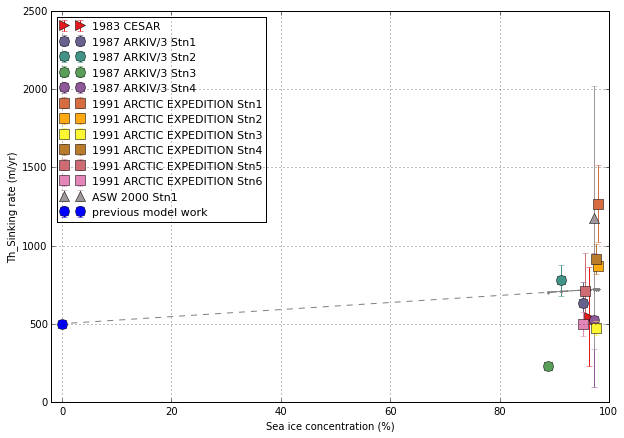

In [83]:
i=np.empty([file_num,1])
#for j in range(11):
#    data=pd.read_csv(nc_filename[j])
#    i[j,:]= data['ice'][0];
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2]) #'remember to add i'
#marker=      ['o','o','o','o',   '^','s','s','s','s','s', 's','D','D','>']
    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.0001)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1**2) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [84]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            WLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     7.983
Date:                Wed, 15 Jul 2015   Prob (F-statistic):             0.0165
Time:                        13:49:30   Log-Likelihood:                -41.409
No. Observations:                  13   AIC:                             86.82
Df Residuals:                      11   BIC:                             87.95
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.2603      0.800      2.826      0.017         0.500     4.021
const        500.0000      0.001   7.86e+05      0.0

In [85]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'sinking_rate':sinking_rate, 'i3': i})
res_wls5 = wls('sinking_rate~i3', data,weights=1./(err1**2)).fit()

In [86]:
a=average(sinking_rate)
#print a
#print sinking_rate

In [87]:
rss=(sinking_rate-a)**2/err1**2
rss_sum=sum(rss)
p1 = 1
p2 = 2
n = file_num
F = (rss_sum - np.sum(res_wls5.resid**2/err1**2))/(np.sum(res_wls5.resid**2/err1**2)) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('df:(%s,%s)'%((p2-p1),(n-p2)))
print ('ftest:%s'%p)

F ratio: 91209411932.6
df:(1,10)
ftest:1.11022302463e-16


#  K value and the ice concentration

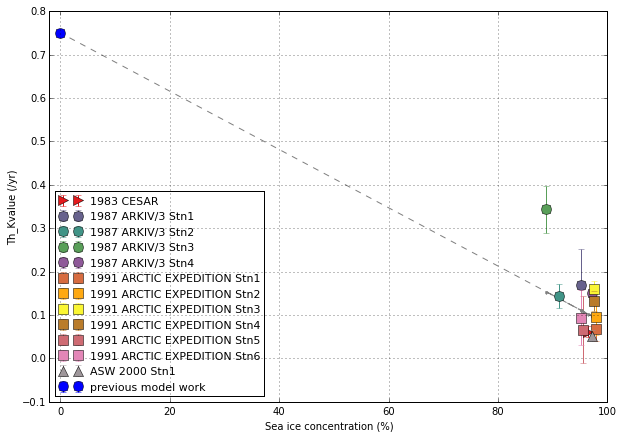

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1854.
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           1.29e-13
Time:                        13:49:31   Log-Likelihood:                -28.666
No. Observations:                  13   AIC:                             61.33
Df Residuals:                      11   BIC:                             62.46
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0067      0.000    -43.061      0.000        -0.007    -0.006
const          0.7500      0.000   3143.081      0.0

In [88]:
err2=WLS_err2/WLS_coef2*Kvalue
#err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2*1.6# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.75)
err2=numpy.append(err2,0.0001)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./err2**2)
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)
    
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print res_wls4.summary() 

#  J value and the ice concentration

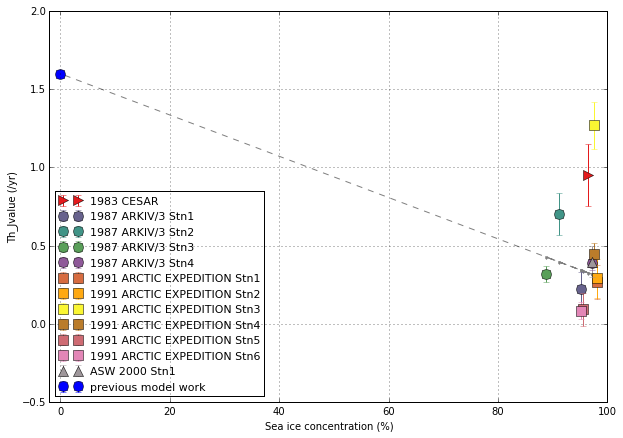

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            WLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     382.5
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           6.79e-10
Time:                        13:49:33   Log-Likelihood:                -31.287
No. Observations:                  13   AIC:                             66.57
Df Residuals:                      11   BIC:                             67.70
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0132      0.001    -19.558      0.000        -0.015    -0.012
const          1.6000      0.003    548.091      0.0

In [89]:
err2=WLS_err2/WLS_coef2*Jvalue

Jvalue=numpy.append(Jvalue,1.6)
err2=numpy.append(err2,0.001)

mod_wls4 = sm.WLS(Jvalue, i2, weights=1./err2**2).fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, mod_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Jvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*23),label=name)
    
errorbar(i[-1],Jvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Jvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()
print mod_wls4.summary()

# map

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


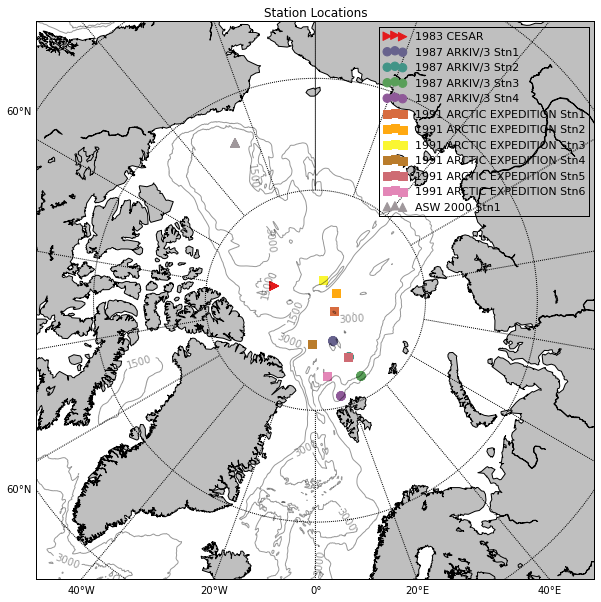

In [90]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Set1(j*23),marker=marker[j],s=70,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()